In [23]:
import os 
import numpy as np
import scipy
import scipy.optimize
from scipy.optimize import curve_fit
from scipy import stats
from scipy.stats import poisson
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.colors as mcolors
from mpl_toolkits import mplot3d
import glob
import time
import pandas as pd
import math
import pathlib
from datetime import date
plt.rcParams['font.family']='stixgeneral'

print (time.ctime())

Wed Jan  4 17:33:42 2023


In [24]:
f_path = "Data_fake_exp"
identifier = "fake"
nameofuser = "Jane"
VersionofCode = "Version 1"
Date = date.today()

In [25]:
l=os.listdir(f_path)
l=[ x for x in l if ".csv" not in x ]
l=[ x for x in l if "results" not in x ]
l=[ x for x in l if "checkpoints" not in x ]
l=[ x for x in l if identifier in x ]

print (l)

['fakedata_exp']


In [26]:
def Eight(x,y,file,plot,folder,plottitle,afterpulse_control = True):
    n=8
    
    #global filename 
    Eight.filename = file
    #x,y are lists containing x and y values of ions obtained after "Pandas" analysis
    
    x1,y1=x[0],y[0];x2,y2=x[1],y[1];x3,y3=x[2],y[2];x4,y4=x[3],y[3];
    x5,y5=x[4],y[4];x6,y6=x[5],y[5];x7,y7=x[6],y[6];x8,y8=x[7],y[7]
    
    
    old_data_table = pd.read_csv(file)
    old_data_table = old_data_table.drop(columns = 'Unnamed: 0')
    old_data_table['time'] = ((25*old_data_table['time'])/(4096)) # Conversion factor from camera time to ns

    
    
    R = 1 # radius of region of interest. Individual ions can be given different radii 


    R1 = R
    Ion_1 = (
        old_data_table
        #.query("`cluster size` > 3")
        .query(f"{x1-R1} <= x <= {x1+R1} and {y1-2*R1} <= y <= {y1+2*R1}")
        .reset_index(drop=True)
    )
    
    
    name = Ion_1
    dt = np.diff(name["time"])
    dt = np.insert(dt,0,0)           # dt of first ion hit is 0 
    Ion_1['dt'] = dt                 #Create and Save the difference in time between events in the ROI
    
    if afterpulse_control:
        Ion_1.query(f' dt > 1e-7', inplace = True) # eliminate after pulsing effects, this prevents breaks in dark states, and peaks at 0(s) bright states
        Ion_1.reset_index(inplace = True)
    Ion_1['index'] = np.arange(len(name)) # new index is used in certain functions in class: "Ion"
    
    
    ### Same for the rest of the Ions ### 
    R2 = R
    Ion_2 = (
        old_data_table
        #.query("`cluster size` > 3")
        .query(f"{x2-R2} <= x <= {x2+R2} and {y2-2*R2} <= y <= {y2+2*R2}")
        .reset_index(drop=True)
    )
    name = Ion_2
    dt = np.diff(name["time"])
    dt =np.insert(dt,0,0)
    Ion_2['dt'] = dt
    
    if afterpulse_control:
        Ion_2.query(f' dt > 1e-7', inplace = True) # eliminate after pulsing effects, this prevents breaks in dark states, and peaks at 0(s) bright states
        Ion_2.reset_index(inplace = True)
    Ion_2['index'] = np.arange(len(name))
    
    R3 = R
    Ion_3 = (
        old_data_table
        #.query("`cluster size` > 3")
        .query(f"{x3-R3} <= x <= {x3+R3} and {y3-2*R3} <= y <= {y3+2*R3}")
        .reset_index(drop=True)
    )
    name = Ion_3
    dt = np.diff(name["time"])
    dt =np.insert(dt,0,0)
    Ion_3['dt'] = dt
    
    if afterpulse_control:
        Ion_3.query(f' dt > 1e-7', inplace = True) # eliminate after pulsing effects, this prevents breaks in dark states, and peaks at 0(s) bright states
        Ion_3.reset_index(inplace = True)
    Ion_3['index'] = np.arange(len(name))
    
    R4 = R
    Ion_4 = (
        old_data_table
        #.query("`cluster size` > 3")
        .query(f"{x4-R4} <= x <= {x4+R4} and {y4-2*R4} <= y <= {y4+2*R4}")
        .reset_index(drop=True)
    )
    name = Ion_4
    dt = np.diff(name["time"])
    dt =np.insert(dt,0,0)
    Ion_4['dt'] = dt
    
    if afterpulse_control:
        Ion_4.query(f' dt > 1e-7', inplace = True) # eliminate after pulsing effects, this prevents breaks in dark states, and peaks at 0(s) bright states
        Ion_4.reset_index(inplace = True)
    Ion_4['index'] = np.arange(len(name))
    
    R5 = R
    Ion_5 = (
        old_data_table
        #.query("`cluster size` > 3")
        .query(f"{x5-R5} <= x <= {x5+R5} and {y5-2*R5} <= y <= {y5+2*R5}")
        .reset_index(drop=True)
    )
    name = Ion_5
    dt = np.diff(name["time"])
    dt =np.insert(dt,0,0)
    Ion_5['dt'] = dt
    
    if afterpulse_control:
        Ion_5.query(f' dt > 1e-7', inplace = True) 
        Ion_5.reset_index(inplace = True)
    Ion_5['index'] = np.arange(len(name))
    
    R6 = R
    Ion_6 = (
        old_data_table
        #.query("`cluster size` > 3")
        .query(f"{x6-R6} <= x <= {x6+R6} and {y6-2*R6} <= y <= {y6+2*R6}")
        .reset_index(drop=True)
    )
    name = Ion_6
    dt = np.diff(name["time"])
    dt =np.insert(dt,0,0)
    name['dt'] = dt
    
    if afterpulse_control:
        Ion_6.query(f' dt > 1e-7', inplace = True) 
        Ion_6.reset_index(inplace = True)
    Ion_6['index'] = np.arange(len(name))
    
    
    R7 = R
    Ion_7 = (
        old_data_table
        #.query("`cluster size` > 3")
        .query(f"{x7-R7} <= x <= {x7+R7} and {y7-2*R7} <= y <= {y7+2*R7}")
        .reset_index(drop=True)
    )
    name = Ion_7
    dt = np.diff(name["time"])
    dt =np.insert(dt,0,0)
    name['dt'] = dt
    
    if afterpulse_control:
        Ion_7.query(f' dt > 1e-7', inplace = True) 
        Ion_7.reset_index(inplace = True)
    Ion_7['index'] = np.arange(len(name))
    

    R8 = R
    Ion_8 = (
        old_data_table
        #.query("`cluster size` > 3")
        .query(f"{x8-R8} <= x <= {x8+R8} and {y8-2*R8} <= y <= {y8+2*R8}")
        .reset_index(drop=True)
    )
    name = Ion_8
    dt = np.diff(name["time"])
    dt =np.insert(dt,0,0)
    name['dt'] = dt
    
    if afterpulse_control:
        Ion_8.query(f' dt > 1e-7', inplace = True) 
        Ion_8.reset_index(inplace = True)
    Ion_8['index'] = np.arange(len(name))
    
    
    # Creates a data set to call in the actual analysis Notebook
    
    
    data_table = Ion_1
    data_table = data_table.append(Ion_2)
    data_table = data_table.append(Ion_3)
    data_table = data_table.append(Ion_4)
    data_table = data_table.append(Ion_5)
    data_table = data_table.append(Ion_6)
    data_table = data_table.append(Ion_7)
    data_table = data_table.append(Ion_8)
    Eight.data_table=data_table
     
        
    #Define the different ions with the given functions associated  with the class: "Ion"
    
    
    Eight.ion_1 = Ion(1, x1, y1, R1, Ion_1)
    Eight.ion_2 = Ion(2, x2, y2, R2, Ion_2)
    Eight.ion_3 = Ion(3, x3, y3, R3, Ion_3)
    Eight.ion_4 = Ion(4, x4, y4, R4, Ion_4)
    Eight.ion_5 = Ion(5, x5, y5, R5, Ion_5)
    Eight.ion_6 = Ion(6, x6, y6, R6, Ion_6)
    Eight.ion_7 = Ion(7, x7, y7, R7, Ion_7)
    Eight.ion_8 = Ion(8, x8, y8, R8, Ion_8)
    
    
    if plot==True:
        fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 4))
        ax1.hist2d(old_data_table['x'], old_data_table['y'], range = [(min(data_table['x'])-2, max(data_table['x'])+2), (min(data_table['y'])-2, max(data_table['y'])+2)], bins = (int(max(data_table['x']) - min(data_table['x']) +5) , int(max(data_table['y']) - min(data_table['y']) +5)))
        ax2.hist2d(data_table['x'], data_table['y'], range = [(min(data_table['x'])-2, max(data_table['x'])+2), (min(data_table['y'])-2, max(data_table['y'])+2)], bins = (int(max(data_table['x']) - min(data_table['x']) +5) , int(max(data_table['y']) - min(data_table['y']) +5)))
      
        ax1.set_title(f'{plottitle}'+' Full Data')
        ax2.set_title(f'{plottitle}'+' True Ion ROI')
        plt.savefig(folder+'/ionsROI '+ f'{Date}'+'.pdf')
        plt.show()

In [27]:
def Position(file, folder):

        filename = file
        print (filename)
        it = pd.read_csv(filename)
        it.head(2)
        n=8 #number of ions 

        ###plotting average postion################################################################################################

        plt.figure(figsize=(10,6))
        plt.hist2d(it['x'], it['y'], bins = (256, 256), range = [(0, 256), (0, 256)])
        x_left,x_right,y_bottom,y_top=15,75,75,110 #estimated after visualizing h2d above
        plt.xlim(x_left,x_right)    #left and right limits on plot
        plt.ylim(y_bottom,y_top)    #top and bottom limits
        plt.title('Average photon position, file is ' + filename, fontsize="22", pad=20)
        plt.ylabel("y position", fontsize="20")
        plt.xlabel('x positon', fontsize="20")
        grid_x=[19,27,32,39,46,52,57,64,72] #sub-section boundaries (1 more than ions)
        plt.yticks(fontsize='16')
        plt.xticks(grid_x, fontsize='16')
        plt.grid(axis="x")
        plt.savefig(folder + '/avg_yvsx '+f'{Date}'+'.pdf')

        #############################################################################################################################


        #####Finding average x and y positions of ions#############################################################################

        a=np.empty((n,2))                                           # empty  n by 2 matrix 
        for i in range (1,n+1):

            temp=it[(it['x']>grid_x[i-1]) & (it['x'] <grid_x[i])]   # sub-dataframe for x values between 
            #print (temp)                                                          #upper and lower bounds of box
            temp_2=temp.groupby(["x",'y']).size().idxmax()  #most frequently occuring x and y values
            #print (temp_2)                                                         #in given "grid box"
            a[i-1][0]=temp_2[0]; a[i-1][1]=temp_2[1]                #append values to our array



        #this gives avg x and y poition of ion, we use this later in the data analysis portion
        #is this grid system done by hand? feels like we should automate it 
        #like give it an x range to scan over, and then pick the lowest intesity within that section and that is the grid

        x1=a[0][0]
        y1=a[0][1]

        x2=a[1][0]
        y2=a[1][1]

        x3=a[2][0]
        y3=a[2][1]

        x4=a[3][0]
        y4=a[3][1]

        x5=a[4][0]
        y5=a[4][1]

        x6=a[5][0]
        y6=a[5][1]

        x7=a[6][0]
        y7=a[6][1]

        x8=a[7][0]
        y8=a[7][1]

        positionx = [x1,x2,x3,x4,x5,x6,x7,x8]
        positiony = [y1,y2,y3,y4,y5,y6,y7,y8]
        
        print ("\nx:",positionx,"\ny:",positiony) # printing avg x and y position
        print ("")
        print ("")

        #################################################################################################################



        ####Plotting Time vs x positon graph#############################################################################




        plt.rcParams['axes.formatter.limits'] = [-7,7]
        plt.rc('font', size=16)
        plt.figure(figsize=(5,14))
        t=(it["time"]*25/(4096))/1e9 # converting camera time to nanoseconds
        plt.hist2d(it['x'], t, bins = [100, 399]) # number of bins ion each dimension x=256 y=400
        plt.title('Time vs X postion, file is ' + filename, fontsize="22", pad=20)
        plt.ylabel("Time(seconds)", fontsize="20")
        plt.xlabel('x positon', fontsize="20")
        it['time'].max()
        start = 0; end = t.max(); duration = end - start
        plt.ylim(start, end)
        plt.xlim(10,80)
        plt.show()
        plt.savefig(folder + '/timevsx '+f'{Date}'+'.pdf')  
    ############################################################################################################################

        return (positionx,positiony)
 

In [28]:
class Ion:
    def __init__(self, n, x,y,r0,data,debugPrinting=False):
        self.filename=Eight.filename
        self.n = n # Ion number (left to right)
        self.x = x # Ion x-position
        self.y = y # Ion y-position
        self.r0 = r0 # Ion radius
        
        self.data = data # Dataframe used (data_table in choose_file)
        self.threshold = [] # differentiator between bright/dark states by 'dt' between events in ROI
        self.bright = [] # stores data for only bright events
        self.dark = [] # stores data for only dark events
        self.transpts = []  # Transition points (index number)
        # DtB = dark to bright
        # BtD = bright to dark
        self.tofBright=[]  
        self.tofDark=[]
        self.dtDark=[]
        self.dtBright=[]
        self.DtB = []
        self.BtD = []
        self.brightRanges = []
        self.rate=[]        # Optimal transition rate (after error minimization)
    

    
    
    def State(self,dT,k_l,k_u,k_poiss,folder,plot=False):   # determines state using integration 
                                                       # time dT and parameter k 
        global k_lower;global k_upper;global data
        self.dT=dT
        k_lower,k_upper=k_l,k_u
        
        rate_dT=[]                                #list of rate for all k within bounds 
        self.name=ion_1

        with open(folder + '/quantumjumpinfo '+ f'ion {self.n} {Date}.txt', 'w') as f:
            f.write(f"Code Version: {VersionofCode}   User: {nameofuser}   Date: {Date} \n")  
            f.write('\n')     
            f.write(f"Ion_{self.n} Poisson Intersection:{k_poiss} \n")
            print (f"Ion_{self.n}\nPoisson Intersection:{k_poiss}")
            print ('')
            for j in range (k_lower,k_upper):         # lower and upper limit from "ranges" dictionary
                print (f"At k={j}:")
                f.write(f"At k={j}:\n")
                data=self.data
                steps=j                                           # max dark photons in dT
                state=[]
                for i in range(min(data.index),max(data.index)+1,steps): # if k+1 or more photons in dT 
                                                                           #=> bright state
                    if (i+steps-1)<len(data):
                        if (data["time"][i+steps-1]-data["time"][i])<dT: # bright state
                            state.extend(([1]*steps))
                        else: state.extend(([0]*steps))
                    else:
                        hits=len(data[i:]) #number of hits/events left in dataframe
                        max_dT=dT/(steps+1) #max mean time difference between two hits in bright state
                        if (max(data["time"])-data["time"][i])>(max_dT*hits):
                            state.extend(([0]*len(data[i:])))
                        else: state.extend(([1]*len(data[i:])))

                self.data["state"]=state
                self.bright=data[data["state"]==1]
                self.dark=data[data["state"]==0]

                self.transitions()                                        # gives rate and transpts 

                self.hline_BtD=np.array((data.iloc[self.BtD]["time"])*1e-9)    #transition lines for the plot
                self.hline_DtB=np.array((data.iloc[self.DtB]["time"])*1e-9)

                print ('Number of jumps from Bright to Dark: ' + str(len(self.hline_BtD)))
                print ('Number of jumps from Bright to Dark: ' + str(len(self.hline_DtB)))
                f.write('Number of jumps from Bright to Dark: ' + f'{len(self.hline_DtB)}\n')
                f.write('Number of jumps from Bright to Dark: ' + f'{len(self.hline_DtB)}\n')


                if k_upper-k_lower>1:           #appends rate for each "k" in an array
                                                    # not executed when called through "min_error_k" func
                        rate_dT.append(self.rate)
                print ("Transitions", len(self.transpts), "Rate:",self.rate)
                print ("")
                f.write(f"Transitions {len(self.transpts)} Rate: {len(self.hline_BtD)}\n")
                f.write('\n')

        # plotting
     
            if plot==True:
                fig,(ax,ax1,ax2, ax3)=plt.subplots(4,1,figsize=(20,10))
                ax.set_title(f"Max Dark={j}") 
                ax.hist2d((data["time"]*1e-9),data["x"],bins=(400,3),cmap="YlGnBu")
                ax.set_ylabel("Position")

    
                ymin,ymax=name.x-name.r0,name.x+name.r0                #ROI of ion     

                #ax1.hist2d((data["time"][:10000]*1e-9),data["x"][:10000],bins=(400,3),cmap="YlGnBu")
                ax1.hist2d((data["time"]*1e-9),data["x"],bins=(400,3),cmap="YlGnBu")
                ax1.vlines(self.hline_BtD,ymin,ymax,color="b",lw=0.8,ls="--",label="Transpt BtD")
                ax1.vlines(self.hline_DtB,ymin,ymax,color="r",lw=0.8,ls="--",label="Transpt DtB")
                ax1.set_ylabel("Position")
                ax1.legend()

                #ax2.hist2d((data["time"][:10000]*1e-9),data["x"][:10000],bins=(400,3),cmap="YlGnBu")
                ax2.hist2d((data["time"]*1e-9),data["x"],bins=(400,3),cmap="YlGnBu")
                ax2.set_ylabel("Position")
                ax2.set_xlabel("Time (s)")
                
                #ax2.hist2d((data["time"][:10000]*1e-9),data["x"][:10000],bins=(400,3),cmap="YlGnBu")
                ax3.hist2d((data["time"]*1e-9),data["x"],bins=(400,3),cmap="YlGnBu")
                ax3.set_ylabel("Position")
                ax3.set_xlabel("Time (s)")
                
                
                

                plt.show()

        if k_upper-k_lower>1:       #returns lists of rates and errors for each ion at each k
                                                #not executed when called through "min_error_k"
                rate_dT=np.array(rate_dT)
                error_dT=self.error_transrate(rate_dT)
                return rate_dT,error_dT,len(self.hline_BtD),len(self.hline_DtB)
        
    
    def State_optimal(self,dT,k_l,k_u,k_poiss,folder,plot=False):   # determines state using integration 
                                                       # time dT and parameter k 
        global k_lower;global k_upper;global data
        self.dT=dT
        k_lower,k_upper=k_l,k_u
        
        rate_dT=[]                                #list of rate for all k within bounds 
        self.name=ion_1

        with open(folder + '/quantumjumpinfo '+ f'ion {self.n} {Date}.txt', 'a') as f:
            f.write('\n')
            f.write(f"Optimal Values for Ion_{self.n} with Poisson Intersection:{k_poiss} \n")
            f.write(f"Ion_{self.n} Poisson Intersection:{k_poiss} \n")
            print (f"Ion_{self.n}\nPoisson Intersection:{k_poiss}")
            for j in range (k_lower,k_upper):         # lower and upper limit from "ranges" dictionary
                print (f"At k={j}:")
                f.write(f"At k={j}:\n")
                data=self.data
                steps=j                                           # max dark photons in dT
                state=[]
                for i in range(min(data.index),max(data.index)+1,steps): # if k+1 or more photons in dT 
                                                                           #=> bright state
                    if (i+steps-1)<len(data):
                        if (data["time"][i+steps-1]-data["time"][i])<dT: # bright state
                            state.extend(([1]*steps))
                        else: state.extend(([0]*steps))
                    else:
                        hits=len(data[i:]) #number of hits/events left in dataframe
                        max_dT=dT/(steps+1) #max mean time difference between two hits in bright state
                        if (max(data["time"])-data["time"][i])>(max_dT*hits):
                            state.extend(([0]*len(data[i:])))
                        else: state.extend(([1]*len(data[i:])))

                self.data["state"]=state
                self.bright=data[data["state"]==1]
                self.dark=data[data["state"]==0]

                self.transitions()                                        # gives rate and transpts 

                self.hline_BtD=np.array((data.iloc[self.BtD]["time"])*1e-9)    #transition lines for the plot
                self.hline_DtB=np.array((data.iloc[self.DtB]["time"])*1e-9)

                print ('Number of jumps from Bright to Dark: ' + str(len(self.hline_BtD)))
                print ('Number of jumps from Bright to Dark: ' + str(len(self.hline_DtB)))
                f.write('Number of jumps from Bright to Dark: ' + f'{len(self.hline_DtB)}\n')
                f.write('Number of jumps from Bright to Dark: ' + f'{len(self.hline_DtB)}\n')


                if k_upper-k_lower>1:           #appends rate for each "k" in an array
                                                    # not executed when called through "min_error_k" func
                        rate_dT.append(self.rate)
                print ("Transitions", len(self.transpts), "Rate:",self.rate)
                print ("")
                f.write(f"Transitions {len(self.transpts)} Rate: {len(self.hline_BtD)}\n")
                f.write('\n')

        # plotting
     
            if plot==True:
                fig,(ax,ax1,ax2, ax3)=plt.subplots(4,1,figsize=(20,10))
                ax.set_title(f"Max Dark={j}") 
                ax.hist2d((data["time"]*1e-9),data["x"],bins=(400,3),cmap="YlGnBu")
                ax.set_ylabel("Position")

    
                ymin,ymax=name.x-name.r0,name.x+name.r0                #ROI of ion     

                #ax1.hist2d((data["time"][:10000]*1e-9),data["x"][:10000],bins=(400,3),cmap="YlGnBu")
                ax1.hist2d((data["time"]*1e-9),data["x"],bins=(400,3),cmap="YlGnBu")
                ax1.vlines(self.hline_BtD,ymin,ymax,color="b",lw=0.8,ls="--",label="Transpt BtD")
                ax1.vlines(self.hline_DtB,ymin,ymax,color="r",lw=0.8,ls="--",label="Transpt DtB")
                ax1.set_ylabel("Position")
                ax1.legend()

                #ax2.hist2d((data["time"][:10000]*1e-9),data["x"][:10000],bins=(400,3),cmap="YlGnBu")
                ax2.hist2d((data["time"]*1e-9),data["x"],bins=(400,3),cmap="YlGnBu")
                ax2.set_ylabel("Position")
                ax2.set_xlabel("Time (s)")
                
                #ax2.hist2d((data["time"][:10000]*1e-9),data["x"][:10000],bins=(400,3),cmap="YlGnBu")
                ax3.hist2d((data["time"]*1e-9),data["x"],bins=(400,3),cmap="YlGnBu")
                ax3.set_ylabel("Position")
                ax3.set_xlabel("Time (s)")
                
                
                

                plt.show()

        if k_upper-k_lower>1:       #returns lists of rates and errors for each ion at each k
                                                #not executed when called through "min_error_k"
                rate_dT=np.array(rate_dT)
                error_dT=self.error_transrate(rate_dT)
                return rate_dT,error_dT,len(self.hline_BtD),len(self.hline_DtB)
        

    def min_error_k(self,rate_dT,error_dT,folder,plot):  # returns "Optimal Transitions" by minimizing error 

        perror_dT=error_dT/rate_dT   # array of percent errors
        min_perror,min_perror_idx=min(perror_dT),np.argmin(perror_dT)    # minimum percent error and its index
                                                                           
        self.error=error_dT[min_perror_idx]    #final error is one with min percent error
        self.rate=rate_dT[min_perror_idx]
        self.k=np.arange(k_lower,k_upper)[min_perror_idx] # gives "k" corresponding to minimum perror
        self.State_optimal(self.dT,self.k,self.k+1,self.k_poiss,folder,plot=False) # call "State" one final time to get Optimal Data
        d2b=len(self.hline_DtB)
        b2d=len(self.hline_BtD)
            
            
        j=self.k
        
        if plot==True:
            
                r1=round(len(data["time"])*(1/4))
                r2=round(len(data["time"])*(2/4))
                r3=round(len(data["time"])*(3/4))
                r4=round(len(data["time"])*(4/4))
                print (r1,r2,r3,r4)
            
            
            
                fig,(ax,ax1,ax2, ax3)=plt.subplots(4,1,figsize=(20,10))
                ymin,ymax=self.x-self.r0,self.x+self.r0 
                ax.set_title(f"Max Dark={j}") 
                ax.hist2d((data["time"][:r1]*1e-9),data["x"][:r1],bins=(400,3),cmap="YlGnBu")
                ax.vlines(self.hline_BtD,ymin,ymax,color="b",lw=0.8,ls="--",label="Transpt BtD")
                ax.vlines(self.hline_DtB,ymin,ymax,color="r",lw=0.8,ls="--",label="Transpt DtB")
                ax.set_ylabel("Position")
                ax.legend()

                #plotting the first 5000 events 
                               #ROI of ion     

                ax1.hist2d((data["time"][r1:r2]*1e-9),data["x"][r1:r2],bins=(400,3),cmap="YlGnBu")
                ax1.vlines(self.hline_BtD,ymin,ymax,color="b",lw=0.8,ls="--",label="Transpt BtD")
                ax1.vlines(self.hline_DtB,ymin,ymax,color="r",lw=0.8,ls="--",label="Transpt DtB")
                ax1.set_ylabel("Position")
                ax1.legend()

                ax2.hist2d((data["time"][r2:r3]*1e-9),data["x"][r2:r3],bins=(400,3),cmap="YlGnBu")
                ax2.vlines(self.hline_BtD,ymin,ymax,color="b",lw=0.8,ls="--",label="Transpt BtD")
                ax2.vlines(self.hline_DtB,ymin,ymax,color="r",lw=0.8,ls="--",label="Transpt DtB")
                ax2.set_ylabel("Position")
                ax2.set_xlabel("Time (s)")
                ax2.axvline(17,c="k",lw=2)
                
                
                ax3.hist2d((data["time"][r3:]*1e-9),data["x"][r3:],bins=(400,3),cmap="YlGnBu")
                ax3.vlines(self.hline_BtD,ymin,ymax,color="b",lw=0.8,ls="--",label="Transpt BtD")
                ax3.vlines(self.hline_DtB,ymin,ymax,color="r",lw=0.8,ls="--",label="Transpt DtB")
                ax3.set_ylabel("Position")
                ax3.set_xlabel("Time (s)")
                ax3.axvline(17,c="k",lw=2)
                
                plt.tight_layout()
                plt.savefig(folder + '/quantumjumps '+ f'ion {self.n}_{Date}.pdf' )  
                

                plt.show()
        return self.rate,self.error,self.k,b2d,d2b
            
                 
        
    def transitions(self,single_photon_control = True): #finds transition points
        #global transpts 
        global DtB; global BtD; #global rate
        # identifies points where quantum jumps happen using list comprehension
        misscount = 0
        transpts=[]
        self.transpts.clear()
        for i in range(len(self.data)) :
            if i not in self.bright['index']:
                misscount = misscount + 1
                if misscount == 1:
                    transpts.append(i)
            if i in self.bright['index'] and misscount >= 1:
                misscount = 0
                transpts.append(i)         
        self.DtB.clear()
        self.BtD.clear()
        #DtB=[]
        #BtD=[]
        for i in range(len(transpts)):
            if transpts[i] in self.bright['index']:
                self.DtB.append(transpts[i])
            else:
                self.BtD.append(transpts[i])
        rate=len(transpts)/((max(data["time"])-min(data["time"]))*1e-9)
        self.transpts=transpts
        self.rate=rate
        #self.DtB,self.BtD=DtB,BtD
        
                
    def error_transrate(self,rates): #finds methodological error due to k. 
                                #average transition rate when k is varied by +-1
        
        err=[]
        for i in range(1,len(rates)-1):       #excludes first and last elements
            diff_left=abs(rates[i]-rates[i-1])
            diff_right=abs(rates[i+1]-rates[i])
            diff=(diff_left+diff_right)/2
            err.append(diff)
        err.insert(0,abs(rates[1]-rates[0]))  #error of first entry
        err.append(abs(rates[-1]-rates[-2]))  # error of last entry     
        return np.array(err)                 #numpy array of errors in seconds
    
    def percent_error(error,rates):
        return np.array(error)/np.array(rates)
                
    def setup(self,kind,sigma, uncertainty_control, single_photon_control):
        
        if kind=="auto":
            self.auto_threshold(sigma,uncertainty_control)
            self.sortbythreshold(uncertainty_control)
            self.transitions(single_photon_control)
        elif kind=="integration":
            self.FindBrightRangesPrecise(arrT,N)
            
        elif kind=="dual":
            self.FindBrightRangesPrecise(arrT,N)
            
    def visRange(self, start, duration):
        
        # plots a small slice of data 
        # and uses red/blue color coding to distinguish between the bright and dark state
        # useful for visualizing the effects of different sorting methods
        
        end = start+duration # index values
        use = self.data.query(f'{start} <= index < {end}')
        index = use.index
        change = use['dt']
        linehere = []
        for j in index:
            if j in self.transpts:
                linehere.append(j)
        
        plt.figure(figsize=(15, 1.5))
        counting = index
        plt.scatter(counting, change)
        plt.title("Visual representation of ion states")
        plt.xlabel("Time (s)")
        plt.ylabel("time between photons (s)")
        plt.ylim(-15,25*self.threshold)

        if linehere != []:
            
            if index[0] in self.dark['index']:
                if index[0] in self.transpts:
                    plt.axvspan(self.data.at[index[0], 'index'], self.data.at[linehere[0], 'index'], alpha=0.3, color='blue')
                    plt.axvspan(start, self.data.at[index[0], 'index'], alpha=0.3, color='red',label="Bright")
                else:
                    plt.axvspan(start, self.data.at[linehere[0], 'index'], alpha=0.3, color='blue',label="Dark")
            if index[0] in self.bright['index']:
                if index[0] in self.transpts:
                    plt.axvspan(self.data.at[index[0], 'index'], self.data.at[linehere[0], 'index'], alpha=0.3, color='red')
                    plt.axvspan(start, self.data.at[index[0], 'index'], alpha=0.3, color='blue')
                else:
                    plt.axvspan(start, self.data.at[linehere[0], 'index'], alpha=0.3, color='red')

            if index[-1] in self.bright['index']:            
                plt.axvspan(self.data.at[linehere[-1], 'index'], end, alpha=0.3, color='red')
            if index[-1] in self.dark['index']:
                plt.axvspan(self.data.at[linehere[-1], 'index'], end, alpha=0.3, color='blue')
                
            for i in range(len(linehere)):
                plt.axvline(x=linehere[i])
            for i in range(len(linehere) - 1):
                if linehere[i] in self.DtB:
                    plt.axvspan(self.data.at[linehere[i], 'index'], self.data.at[linehere[i+1], 'index'], alpha=0.3, color='red')
                if linehere[i] in self.BtD:
                    plt.axvspan(self.data.at[linehere[i], 'index'], self.data.at[linehere[i+1], 'index'], alpha=0.3, color='blue')
            
            
        if linehere == []:
            if len(use) == (0 or 1):
                print(f'Ion {self.n} had {len(use)} hits during this time')
                plt.axvspan(start, end, alpha=0.3, color='blue')
            else:
                if index[0] in self.dark['index']:
                    plt.axvspan(self.data.at[index[0], 'index'], self.data.at[index[-1], 'index'], alpha=0.3, color='blue')
                else:
                    plt.axvspan(self.data.at[index[0], 'index'], self.data.at[index[-1], 'index'], alpha=0.3, color='red')
            plt.axvspan(self.data.at[index[-1], 'index'], end, alpha=0.3, color='blue')
            plt.axvspan(start, self.data.at[index[0], 'index'], alpha=0.3, color='blue')
            
        plt.xlim(start,end) 
        plt.axhline(self.threshold)
        plt.legend()
        plt.show()
 

               
#--------------
    def DeleteTooOldEvents(self, t, prevHits, currInterval):
        while (len(prevHits) > 0 and (t - prevHits[0] > self.dT)):
            if (len(prevHits) == self.N):
                assert (currInterval != None)
                lastRange = None
                if len(self.brightRanges) > 0:
                    lastRange = self.brightRanges[-1]
                if (lastRange != None and lastRange[1] >= currInterval[0]):
                    self.brightRanges.pop()
                    currInterval[0] = lastRange[0]

                currInterval[1] = prevHits[-1]
                self.brightRanges.append(currInterval)
                if self.debugPrinting:
                    print("bright ranges append %s" % currInterval)

            oldElem = prevHits.pop(0)
            if self.debugPrinting:
                print("remove %s, length %s" % (oldElem, len(prevHits)))
    def GetIntervalBegin(self, x):
        res = self.dT * (int)(x / self.dT)
        return res

    def GetCountsForEvents(self,T,folder,titlename):
        # counts events within each integration time
        
        # build arrays xyt with just events in region
        self.dT = T    #integration time
        xi,yi = self.x,self.y
        events=self.data["time"]
      
        res = []
        l = 0
        r = 0
        while l < len(events):
            intervalStart = self.GetIntervalBegin(events[l])
            r = l + 1
            while r < len(events) and events[r] - intervalStart <= self.dT:
                r += 1
            res.append(r - l)
            # print("append %s, interval begin %s, interval end %s, dT %s" % (r-l, intervalStart, events[r-1], self.dT))
            l = r
            
            
        sumTime = max(events)-min(events)
        numberOfWindows = int(sumTime / self.dT)
        numberOfWindowsWithEvents = len(res)
        numberOfWindowsWithoutEvents = int(numberOfWindows - numberOfWindowsWithEvents)
        for i in range(numberOfWindowsWithoutEvents):
            res.append(0)
            
            
       # print (res)    
            
        bins = int(np.amax(res) - np.amin(res))
        entries, bin_edges, patches = plt.hist(res, bins=bins, density=True, label='Data')
        #plt.figure(figsize=(15,8))
        plt.ylabel("Probability")
        plt.xlabel("Counts per interval")
        plt.title(f'Ion {self.n} '+ f'{titlename} '+ f'dT={self.dT*1e-9}(s)')
        plt.tight_layout()
        plt.savefig(folder+'/counts for ion'+ f'{self.n}_{Date}.pdf')
        plt.show()
        
        #following code guesses the point of intersection for scipy.optimize
         # ballpark is good enough as scipy.optimize will give a more accurate number. 
        
        f=int((max(res)/6))
        guess_lamb1=f
        guess_lamb2=max(res)*1/2
        
        return (res,guess_lamb1,guess_lamb2)
    
    def dTimes(self, setthresh=False):
        self.dtimeB.clear()
        self.dtimeD.clear()
        
        dtimes = []
        if setthresh == False:
            for i in range(1, len(self.tofROI)):
                dtimes.append(self.tofROI[i]-self.tofROI[i-1])
                if self.tofROI[i] in self.tofBright:
                    self.dtimeB.append(self.tofROI[i]-self.tofROI[i-1])
                    self.brightindex.append(i)
                if self.tofROI[i] in self.tofDark:
                    self.dtimeD.append(self.tofROI[i]-self.tofROI[i-1])
                    self.darkindex.append(i)
        if setthresh == True:
            for i in range(1, len(self.tofROI)):
                if self.tofROI[i]-self.tofROI[i-1] <= self.threshold:
                    dtimes.append(self.tofROI[i]-self.tofROI[i-1])
                if self.tofROI[i] in self.tofBright:
                    if self.tofROI[i]-self.tofROI[i-1] <= self.threshold:
                        self.dtimeB.append(self.tofROI[i]-self.tofROI[i-1])
                    self.brightindex.append(i)
                if self.tofROI[i] in self.tofDark:
                    self.dtimeD.append(self.tofROI[i]-self.tofROI[i-1])
                    self.darkindex.append(i)


#--------------------------------

    
# 1. integration time method
    def FindBrightRangesPrecise(self, arrX, arrY, arrT):
        prevHits = []
        self.brightRanges = []
        currInterval = None

        for idx in range(len(arrX)):
            if self.IsInRegion(arrX[idx], arrY[idx]):
                t = arrT[idx]
                if self.debugPrinting:
                    print("check %s" % t)
                self.DeleteTooOldEvents(t, prevHits, currInterval)
                prevHits.append(t)
                if len(prevHits) == self.N:
                    currInterval = [prevHits[0], prevHits[-1]]
                    if self.debugPrinting:
                        print("curr interval is started as %s-%s" % (prevHits[0], prevHits[-1]))

        self.DeleteTooOldEvents(1e14, prevHits, currInterval)
        self.timeSplit(arrX, arrY, arrT)
    
    
    def FittingPoisson_double(self, res, guess_lamb1, guess_lamb2,T,folder,titlename):
        
        print (f'Ion {self.n} ')
        
        bins = int(np.amax(res) - np.amin(res))
        entries, bin_edges, patches = plt.hist(res, bins=bins,density=True, label='Data',color="skyblue")
        bin_centers=(bin_edges[:-1]+bin_edges[1:])/2
        
        guess = np.array([guess_lamb1, guess_lamb2])
        print ("Guess:",guess[0],",",guess[1])
        
        def fit_function(k, lamb1, lamb2):             #fits double poisson to data 
            p=poisson.pmf(k, lamb1) + poisson.pmf(k, lamb2)
            p_mag=np.sum(poisson.pmf(k, lamb1) + poisson.pmf(k, lamb2))
            return (p/p_mag)                           #normalized poisson
        
        popt1, cov1 = scipy.optimize.curve_fit(fit_function, bin_edges[:-1], 
                                               entries, p0=guess, maxfev=50000)  # returns best fit 
       
        L1,L2=popt1[0],popt1[1]                                               #mu of each poisson
        k=math.ceil((L1-L2)/math.log(L1/L2))                              #point of intersection 
        self.k_poiss=k
        print ("Intersection:",k,"photons\n",'mean counts in bright state =',np.amax(popt1),'\n', 'mean counts in dark state =', np.amin(popt1))
        
        with open(folder + '/histogram info '+ f'ion {self.n} {Date}.txt', 'w') as f:
            f.write(f"Code Version: {VersionofCode}   User: {nameofuser}   Date: {Date} \n")  
            f.write('\n')  
            f.write(f'{titlename}' + ' ion ' + f'{self.n}\n' )
            f.write("Guess:"+ f'{guess[0]} ,'+ f'{guess[1]}\n')
            f.write("Intersection: "+ f'{k}' + " photons\n" )
            f.write('mean counts in bright state ='+ f'{np.amax(popt1)}\n')
            f.write('mean counts in dark state =' + f'{np.amin(popt1)}\n')
        
        
        # plot fit
        #new_dir = pathlib.Path('/Users/nataliaresende/Dropbox/PYTHON/', new_dir_name)
        #new_dir.mkdir(parents=True, exist_ok=True)
        # You have to make a file inside the new directory
        #new_file = new_dir / 'myfile.txt'
        #new_file.write_text('Hello file')
        
        
        
        
        data_fit = fit_function(bin_edges[:-1], *popt1)
        #plt.figure(figsize=(10,7))
        plt.plot(bin_edges[:-1], data_fit,color="r",ls="--",label="Poisson fit")
        plt.title(f'Histogram of Photon Emissions for Ion' + f'{self.n} of '+ f'{titlename}'+f' per {self.dT*1e-9} s')
        plt.xlabel("# photon emissions")
        plt.ylabel("counts")
        plt.legend()
        #plt.savefig(folder + '/counts for ion'+ f'{count}.pdf')
        plt.tight_layout()
        plt.savefig(folder + '/pisson histogram '+ f'ion {self.n}_{Date}.pdf', bbox_inches='tight' )         
        plt.show()
                  
        return self.k_poiss
        
#### integration time method

Data_fake_exp/fakedata_exp

x: [23.0, 29.0, 35.0, 42.0, 48.0, 54.0, 60.0, 67.0] 
y: [93.0, 93.0, 93.0, 93.0, 93.0, 93.0, 93.0, 93.0]




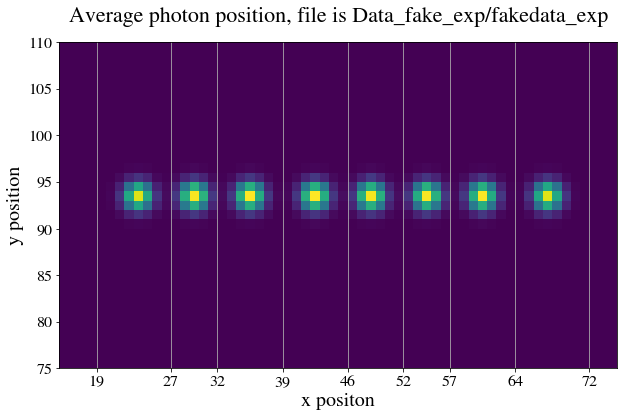

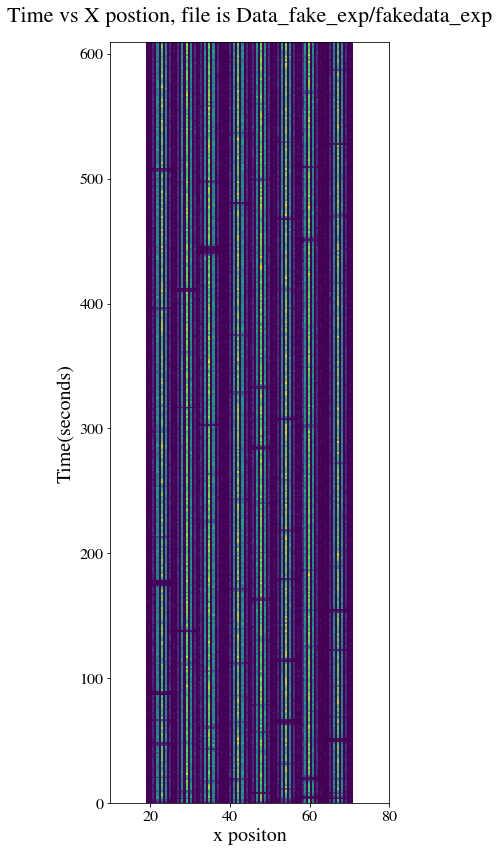

<Figure size 432x288 with 0 Axes>

In [29]:
avgxposition=[]
avgyposition=[]

for i in range(len(l)):
    newpath = f'{f_path}/results_{l[i]}'
    if not os.path.exists(newpath):
        os.makedirs(newpath)
    x,y=Position(f'{f_path}/{l[i]}', newpath)
    avgxposition.append(x)
    avgyposition.append(y)


C:\Users\RA\AppData\Local\Temp\ipykernel_7036\3232062665.py:168: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_table = data_table.append(Ion_2)
C:\Users\RA\AppData\Local\Temp\ipykernel_7036\3232062665.py:169: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_table = data_table.append(Ion_3)
C:\Users\RA\AppData\Local\Temp\ipykernel_7036\3232062665.py:170: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_table = data_table.append(Ion_4)
C:\Users\RA\AppData\Local\Temp\ipykernel_7036\3232062665.py:171: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_table = data_table.append(Ion_5)
C:\Users\RA\AppData\Local\Temp\ipykernel_7036\32

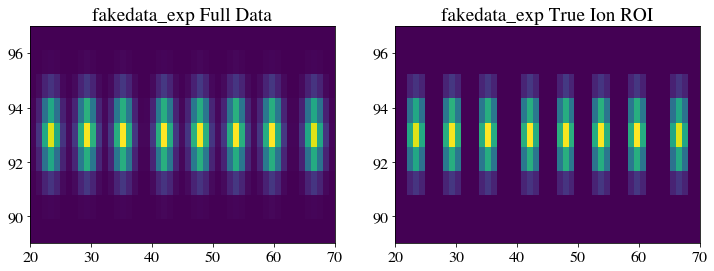

500000000.0
Data_fake_exp/results_fakedata_exp


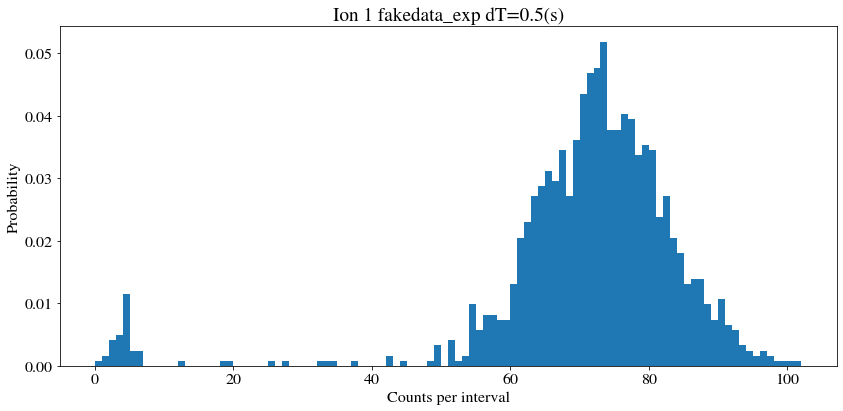

Ion 1 
Guess: 1 , 19
Intersection: 74 photons
 mean counts in bright state = 76.14958629068491 
 mean counts in dark state = 70.10241045957625


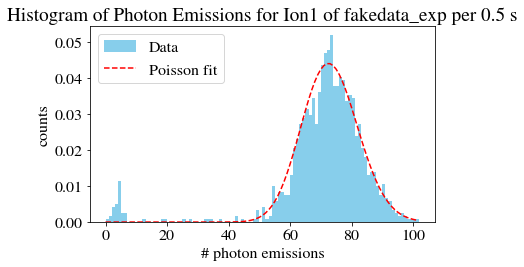

Data_fake_exp/results_fakedata_exp


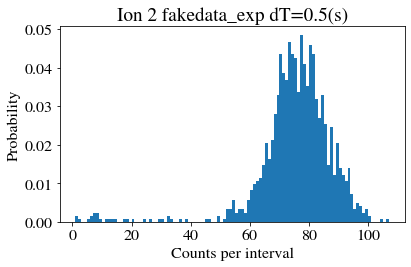

Ion 2 
Guess: 1 , 19
Intersection: 77 photons
 mean counts in bright state = 78.86771311939272 
 mean counts in dark state = 74.27730110311533


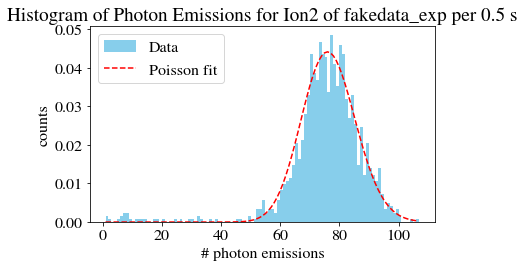

Data_fake_exp/results_fakedata_exp


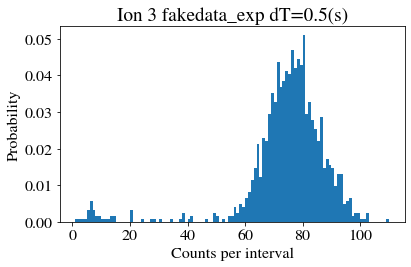

Ion 3 
Guess: 1 , 19
Intersection: 77 photons
 mean counts in bright state = 78.80111399876162 
 mean counts in dark state = 74.14337395616582


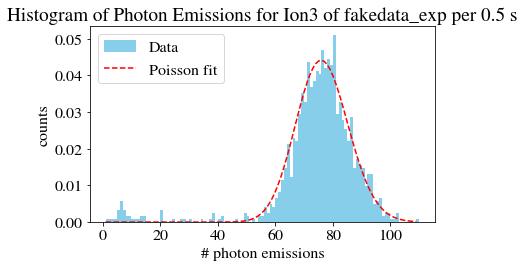

Data_fake_exp/results_fakedata_exp


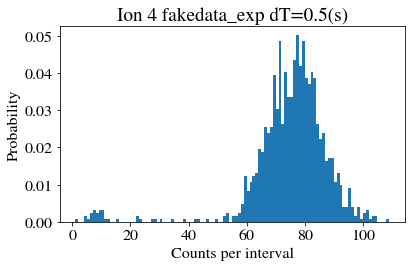

Ion 4 
Guess: 1 , 19
Intersection: 77 photons
 mean counts in bright state = 79.35329026153573 
 mean counts in dark state = 73.72359322108083


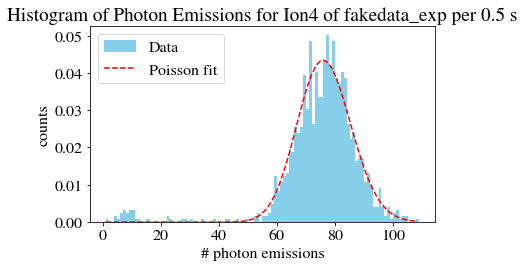

Data_fake_exp/results_fakedata_exp


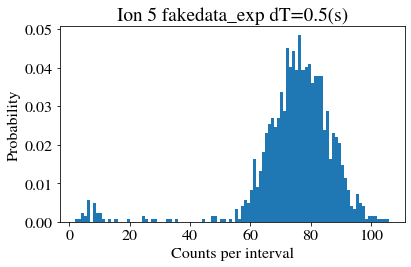

Ion 5 
Guess: 1 , 19
Intersection: 11 photons
 mean counts in bright state = 76.57499928208922 
 mean counts in dark state = 0.07176174892783786


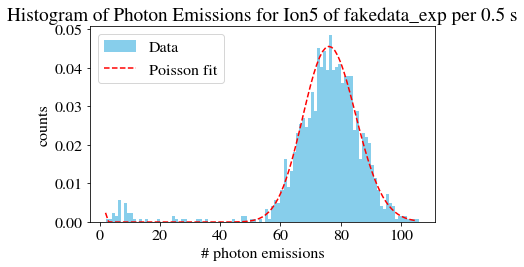

Data_fake_exp/results_fakedata_exp


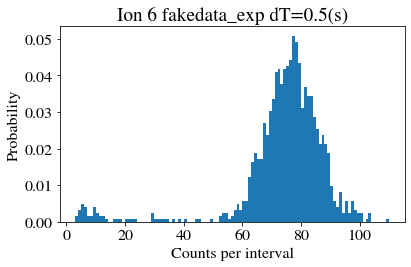

Ion 6 
Guess: 1 , 19
Intersection: 14 photons
 mean counts in bright state = 76.56551929006079 
 mean counts in dark state = 0.29349789146850763


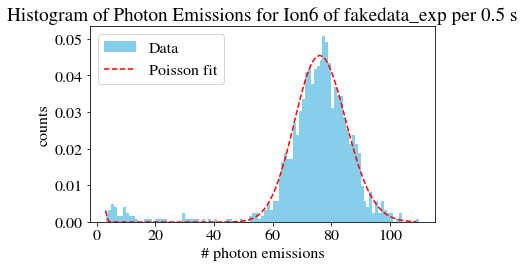

Data_fake_exp/results_fakedata_exp


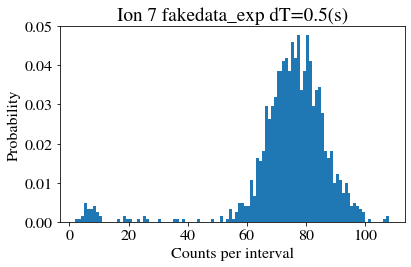

Ion 7 
Guess: 1 , 19
Intersection: 11 photons
 mean counts in bright state = 76.2362408328719 
 mean counts in dark state = 0.06364956122304316


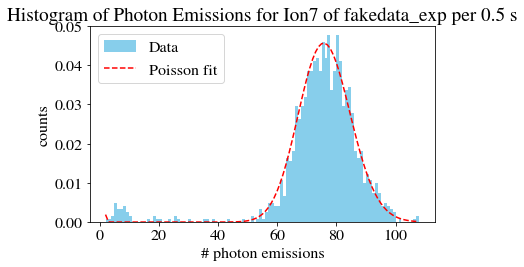

Data_fake_exp/results_fakedata_exp


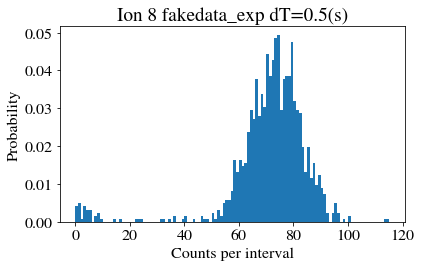

Ion 8 
Guess: 1 , 19
Intersection: 74 photons
 mean counts in bright state = 76.86399137810858 
 mean counts in dark state = 70.19728357586354


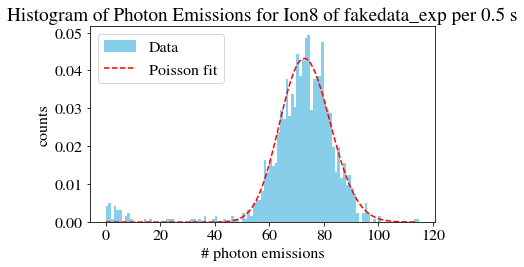

[[74, 77, 77, 77, 11, 14, 11, 74]]


In [37]:
time_interval=5e8

Ions=[]
k_poiss=[]

for i in range(len(l)):
    newpath = f'{f_path}/results_{l[i]}'
    if not os.path.exists(newpath):
        os.makedirs(newpath)
        
    
    
    Eight(x=avgxposition[i],y=avgyposition[i],file=f'{f_path}/{l[i]}',folder=newpath,plottitle=l[i],plot=True)
    ion_1,ion_2,ion_3,ion_4=Eight.ion_1,Eight.ion_2,Eight.ion_3,Eight.ion_4 # make list in list of amoutn of ions!!
    ion_5,ion_6,ion_7,ion_8=Eight.ion_5,Eight.ion_6,Eight.ion_7,Eight.ion_8
    ion_holder=[ion_1,ion_2,ion_3,ion_4,ion_5,ion_6,ion_7,ion_8]
    Ions.append(ion_holder)
    

    c=1
    dT_list=[time_interval] # integration times
    ions=[ion_1,ion_2,ion_3,ion_4,ion_5,ion_6,ion_7,ion_8]
    k_poiss_holder=[]
    for j in range (len(dT_list)):    #try fits for different integration times
        dT=dT_list[j]
        print (dT)
        plt.figure(figsize=(12,6))
        for z in ions:
            print (newpath)
            res,guess_1,guess_2=z.GetCountsForEvents(dT,newpath,l[i])  # gives #photons per dT graph (seen below)
            k=z.FittingPoisson_double(res, 1, 19,dT,newpath,l[i]) # res is counts; also pass mu of each Poisson (ballparked)
                                                 # gives double-Poisson fit 
            c=c+1
            k_poiss_holder.append(k)
    k_poiss.append(k_poiss_holder)
    #k_poiss #intersection point for each ion
print (k_poiss)
#print (Ions)





K_lower:73	 k_upper:81	 Intersection:74

Ion_1
Poisson Intersection:74

At k=73:
Number of jumps from Bright to Dark: 274
Number of jumps from Bright to Dark: 274
Transitions 548 Rate: 0.8996982878998206

At k=74:
Number of jumps from Bright to Dark: 280
Number of jumps from Bright to Dark: 280
Transitions 560 Rate: 0.9193997102625905

At k=75:
Number of jumps from Bright to Dark: 276
Number of jumps from Bright to Dark: 276
Transitions 552 Rate: 0.9062654286874106

At k=76:
Number of jumps from Bright to Dark: 271
Number of jumps from Bright to Dark: 270
Transitions 541 Rate: 0.8882057915215382

At k=77:
Number of jumps from Bright to Dark: 252
Number of jumps from Bright to Dark: 251
Transitions 503 Rate: 0.8258179540394339

At k=78:
Number of jumps from Bright to Dark: 247
Number of jumps from Bright to Dark: 246
Transitions 493 Rate: 0.8094001020704591

At k=79:
Number of jumps from Bright to Dark: 232
Number of jumps from Bright to Dark: 231
Transitions 463 Rate: 0.760146546163534

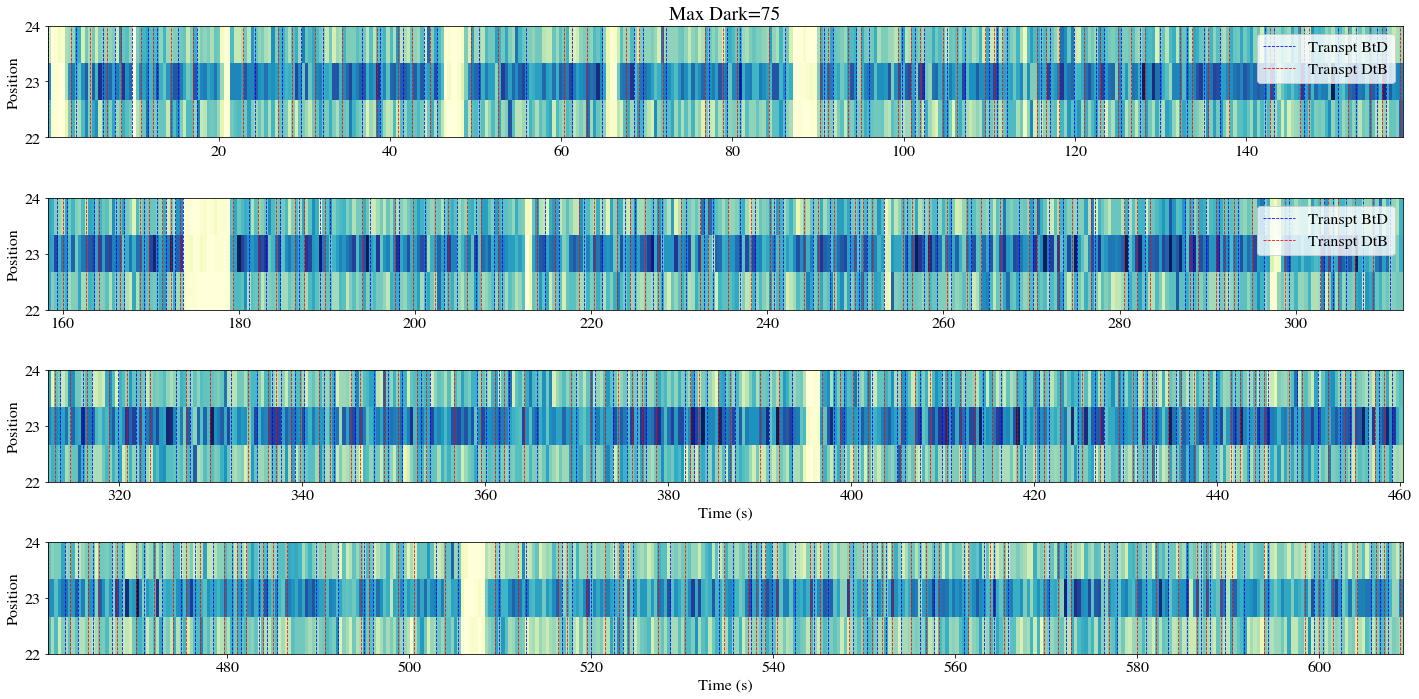

K_lower:76	 k_upper:84	 Intersection:77

Ion_2
Poisson Intersection:77

At k=76:
Number of jumps from Bright to Dark: 286
Number of jumps from Bright to Dark: 286
Transitions 572 Rate: 0.9390814652706173

At k=77:
Number of jumps from Bright to Dark: 286
Number of jumps from Bright to Dark: 286
Transitions 572 Rate: 0.9390814652706173

At k=78:
Number of jumps from Bright to Dark: 284
Number of jumps from Bright to Dark: 283
Transitions 567 Rate: 0.9308727112035665

At k=79:
Number of jumps from Bright to Dark: 284
Number of jumps from Bright to Dark: 284
Transitions 568 Rate: 0.9325144620169766

At k=80:
Number of jumps from Bright to Dark: 267
Number of jumps from Bright to Dark: 266
Transitions 533 Rate: 0.8750531835476207

At k=81:
Number of jumps from Bright to Dark: 253
Number of jumps from Bright to Dark: 252
Transitions 505 Rate: 0.829084160772136

At k=82:
Number of jumps from Bright to Dark: 252
Number of jumps from Bright to Dark: 251
Transitions 503 Rate: 0.8258006591453156

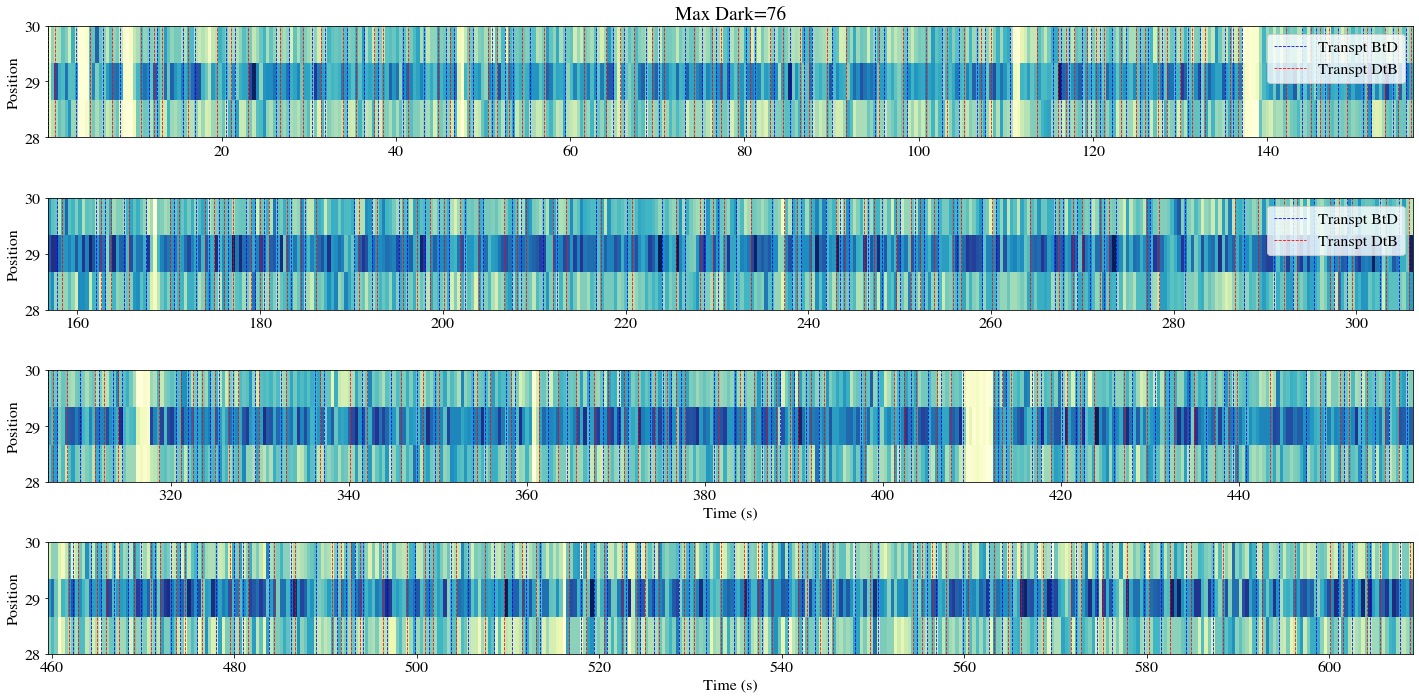

K_lower:76	 k_upper:84	 Intersection:77

Ion_3
Poisson Intersection:77

At k=76:
Number of jumps from Bright to Dark: 283
Number of jumps from Bright to Dark: 283
Transitions 566 Rate: 0.9292162487469624

At k=77:
Number of jumps from Bright to Dark: 282
Number of jumps from Bright to Dark: 282
Transitions 564 Rate: 0.9259327991047469

At k=78:
Number of jumps from Bright to Dark: 282
Number of jumps from Bright to Dark: 282
Transitions 564 Rate: 0.9259327991047469

At k=79:
Number of jumps from Bright to Dark: 285
Number of jumps from Bright to Dark: 285
Transitions 570 Rate: 0.9357831480313932

At k=80:
Number of jumps from Bright to Dark: 272
Number of jumps from Bright to Dark: 272
Transitions 544 Rate: 0.8930983026825928

At k=81:
Number of jumps from Bright to Dark: 256
Number of jumps from Bright to Dark: 256
Transitions 512 Rate: 0.8405631084071461

At k=82:


KeyboardInterrupt: 

In [38]:
# {ion object: (k lower limit, k upper limit, point of intersection) 

ranges=[]
pvalue=7
mvalue=1

for i in range(len(k_poiss)):
    rang={ion_1:(k_poiss[i][0]-mvalue,k_poiss[i][0]+pvalue,k_poiss[i][0]),ion_2:(k_poiss[i][1]-mvalue,k_poiss[i][1]+pvalue,k_poiss[i][1]),ion_3:(k_poiss[i][2]-mvalue,k_poiss[i][2]+pvalue,k_poiss[i][2]),ion_4:(k_poiss[i][3]-mvalue,k_poiss[i][3]+pvalue,k_poiss[i][3]),
        ion_5:(k_poiss[i][4]-mvalue,k_poiss[i][4]+pvalue,k_poiss[i][4]),ion_6:(k_poiss[i][5]-mvalue,k_poiss[i][5]+pvalue,k_poiss[i][5]),ion_7:(k_poiss[i][6]-mvalue,k_poiss[i][6]+pvalue,k_poiss[i][6]),ion_8:(k_poiss[i][7]-mvalue,k_poiss[i][7]+pvalue,k_poiss[i][7])}
    ranges.append(rang)

    
##################################################################################################################################

Bright_to_Dark=[]
Dark_to_Bright=[]
rates=[]
errors=[]


#for i in range(len(l)):
   # newpath = f'{f_path}/results_{l[i]}'
   # if not os.path.exists(newpath):
      #  os.makedirs(newpath)
for i in range(len(Ions)):
    rate_holder=[]
    error_holder=[]
    for j in range(len(Ions[i])):
        n=j+1
            #print (n)
        values=list(ranges[i].values())[n-1] # upper and lower bounds of k from "ranges"
            #print (values)
        print (f"K_lower:{values[0]}\t k_upper:{values[1]}\t Intersection:{values[2]}\n")
        rate,error,u,y=Ions[i][j].State(dT,values[0],values[1],values[2], newpath,plot=False)
        print ("\nOptimal Transition:")
        r,e,k_1,b2d,d2b=Ions[i][j].min_error_k(rate,error,newpath,plot=True)
        Bright_to_Dark.append(b2d)
        Dark_to_Bright.append(d2b)
        rate_holder.append(r)
        error_holder.append(e)
    rates.append(rate_holder)
    errors.append(error_holder)
            
            
print (Bright_to_Dark)
print (Dark_to_Bright)





In [53]:
print ((rates))
print ((errors))

#how does it calculate transition rate?
#how doies it calculate errors?

[[1.1027616673522076, 0.7430934130979556, 0.673163367916297, 0.7940616953412534, 0.6747208465758877, 0.7010519175484993, 0.5858734876921581, 0.7710591171390003], [1.1429492290116745, 0.6723851587118103, 0.6633726571399913, 0.6838032017111122, 0.7232794415979042, 0.7059891985246424, 0.5686094235617163, 0.6905257119853832], [1.1470924868895263, 0.7257628653352242, 0.7372864124704201, 0.7158970721302158, 0.7127133554801329, 0.7620371268641454, 0.6287211227575574, 0.7637629988662978]]
[[0.060898778644823404, 0.041145814678735015, 0.021396390667266174, 0.05266315906926444, 0.014810945412641496, 0.032913235565657284, 0.00329142408815819, 0.02304125430084525], [0.021394298023256653, 0.0032919714012817902, 0.030452590960520665, 0.034560450627998396, 0.04278786230158249, 0.013165299739387293, 0.005760153350118702, 0.00329213688670027], [0.018103324757223538, 0.006582883132292272, 0.026331657588229307, 0.03456054830973454, 0.08394545295493483, 0.013166948196356776, 0.019750401762017478, 0.006584

[23.0, 31.0, 37.0, 43.0, 48.0, 54.0, 60.0, 67.0]
[1.1027616673522076, 0.7430934130979556, 0.673163367916297, 0.7940616953412534, 0.6747208465758877, 0.7010519175484993, 0.5858734876921581, 0.7710591171390003]
[0.060898778644823404, 0.041145814678735015, 0.021396390667266174, 0.05266315906926444, 0.014810945412641496, 0.032913235565657284, 0.00329142408815819, 0.02304125430084525]

[23.0, 30.0, 37.0, 42.0, 48.0, 53.0, 60.0, 67.0]
[1.1429492290116745, 0.6723851587118103, 0.6633726571399913, 0.6838032017111122, 0.7232794415979042, 0.7059891985246424, 0.5686094235617163, 0.6905257119853832]
[0.021394298023256653, 0.0032919714012817902, 0.030452590960520665, 0.034560450627998396, 0.04278786230158249, 0.013165299739387293, 0.005760153350118702, 0.00329213688670027]

[24.0, 32.0, 38.0, 44.0, 49.0, 55.0, 61.0, 68.0]
[1.1470924868895263, 0.7257628653352242, 0.7372864124704201, 0.7158970721302158, 0.7127133554801329, 0.7620371268641454, 0.6287211227575574, 0.7637629988662978]
[0.0181033247572235

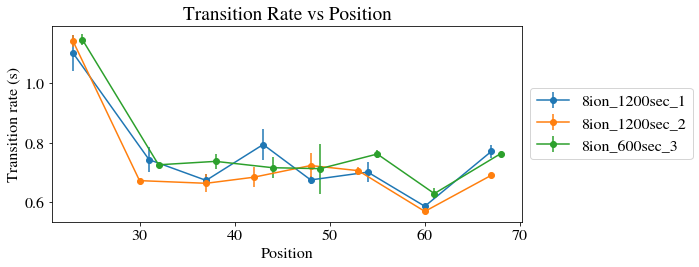

In [54]:
positions=[]

for i in range(len(l)):
    position_holder=[]
    for j in range(len(Ions[i])):
        position = Ions[i][j].x
        position_holder.append(position)
    positions.append(position_holder)
    
plt.figure(figsize=(10,4))    
for i in range(len(l)):
    plt.errorbar(positions[i],rates[i],yerr=errors[i],fmt="-o", label= f'{l[i]}')
    print (positions[i])
    print (rates[i])
    print (errors[i])
    print ("")
plt.title("Transition Rate vs Position")
plt.xlabel("Position")
plt.ylabel("Transition rate (s)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig(f_path + f'/transitionrate at DT{dT}_{Date}.pdf' )  
plt.show()

In [73]:
it = pd.read_csv(f'fakedata_setperiod_erroranalysis_short.csv', index_col=0)
bright2dark_fakedata = list(it['B2D'])
dark2bright_fakedata = list(it['D2B'])


error_B2D=[]
error_D2B=[]
for i in range (len(bright2dark_fakedata)):
    error_B2D.append((bright2dark_fakedata[i]-Bright_to_Dark[i])/bright2dark_fakedata[i])
    error_D2B.append((dark2bright_fakedata[i]-Dark_to_Bright[i])/dark2bright_fakedata[i])


    
    
with open('fakedatastats.txt', 'w') as f:
    for i in range(len(error_B2D)):
        print ("For Ion " + str(i+1))
        print ("Fake data amount of jumps from bright to dark: " +str(bright2dark_fakedata[i]))
        print ("Analysis on fake data amount of jumps from bright to dark: " +str(Bright_to_Dark[i]))
        print ("Precent error between above values: " + str(abs(error_B2D[i])*100))
        print ("")
        print ("Fake data amount of jumps from dark to bright: " +str(dark2bright_fakedata[i]))
        print ("Analysis on fake data amount of jumps from dark to bright: " +str(Dark_to_Bright[i]))
        print ("Precent error between above values: " + str(abs(error_D2B[i])*100))
        print ("")
    
    

        f.write("For Ion " + str(i+1) +f' at dT= {dT}\n')
        f.write("Fake data amount of jumps from bright to dark: " +str(bright2dark_fakedata[i])+'\n')
        f.write("Analysis on fake data amount of jumps from bright to dark: " +str(Bright_to_Dark[i])+'\n')
        f.write("Precent error between above values: " + str(abs(error_B2D[i])*100)+'\n')
        f.write('\n')
        f.write("Fake data amount of jumps from dark to bright: " +str(dark2bright_fakedata[i])+'\n')
        f.write("Analysis on fake data amount of jumps from dark to bright: " +str(Dark_to_Bright[i])+'\n')
        f.write("Precent error between above values: " + str(abs(error_D2B[i])*100)+'\n')
        f.write('\n')
    


For Ion 1
Fake data amount of jumps from bright to dark: 359
Analysis on fake data amount of jumps from bright to dark: 340
Precent error between above values: 5.2924791086350975

Fake data amount of jumps from dark to bright: 359
Analysis on fake data amount of jumps from dark to bright: 340
Precent error between above values: 5.2924791086350975

For Ion 2
Fake data amount of jumps from bright to dark: 277
Analysis on fake data amount of jumps from bright to dark: 276
Precent error between above values: 0.36101083032490977

Fake data amount of jumps from dark to bright: 278
Analysis on fake data amount of jumps from dark to bright: 275
Precent error between above values: 1.079136690647482

For Ion 3
Fake data amount of jumps from bright to dark: 339
Analysis on fake data amount of jumps from bright to dark: 334
Precent error between above values: 1.4749262536873156

Fake data amount of jumps from dark to bright: 339
Analysis on fake data amount of jumps from dark to bright: 334
Precen

In [ ]:
#next steps change fake data to more realistic time jumps anjd do analysis see if DT is more unmiversal 

In [ ]:
#n=8 # ion number
#values=list(ranges.values())[n-1] # upper and lower bounds of k from "ranges"
#print (f"K_lower:{values[0]}\t k_upper:{values[1]}\t Intersection:{values[2]}\n")
#rates_1,errors_1,b2d,d2b=ion_8.State(dT,values[0],values[1],values[2])
#Bright_to_Dark.append(b2d)
#Dark_to_Bight.append(d2b)
#print ("\nOptimal Transition:")
#rate_1,error_1,k_1=ion_8.min_error_k(errors_1,rates_1,plot=True)